In [5]:
import datetime
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_quandl import api

In [9]:
gold_data = quandl.get('LBMA/GOLD', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

In [13]:
gold_data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1999-06-01,265.50,266.85,165.627,165.921,254.603,254.968
1999-06-02,267.05,267.15,166.004,165.911,257.571,257.571
1999-06-03,263.85,264.75,164.290,164.697,254.313,254.714
1999-06-04,266.50,265.30,165.579,165.162,258.312,257.673
1999-06-07,266.35,265.60,165.744,165.452,258.592,258.240


In [14]:
gold_data.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

In [16]:
gold_data = gold_data[['USD (AM)', 'USD (PM)']]

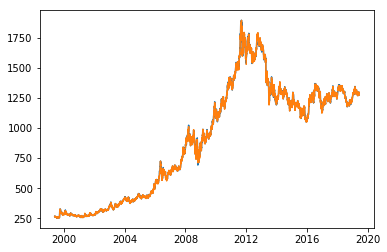

In [17]:
plt.plot(gold_data)
plt.show()

In [18]:
gold_data = quandl.get('BUNDESBANK/BBK01_WT5511', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

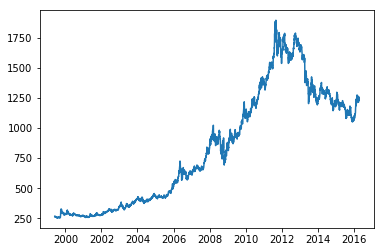

In [19]:
plt.plot(gold_data)
plt.show()